In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Kaggle House prediction competition for learners
* Problem predict the sales price for each house

* Load dataset (dataset source: kaggle.com)

In [3]:
data = pd.read_csv(r'C:\Users\ronny somi\Downloads\home-data-for-ml-course\train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
data['Lo']

0       11970
1        7572
2       12502
3       12019
4       17584
        ...  
1455     9882
1456    12438
1457    16380
1458     5390
1459     6280
Name: QualLivArea, Length: 1460, dtype: int64

In [4]:
list(data.columns)

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# count the number of missing values in each column
missing_values_count = data.isnull().sum()
missing_values_count


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
data_categorical = data.value_counts()
data_categorical

Series([], Name: count, dtype: int64)

## [2nd Step] Exparatory Data Analysis(EDA)

* check for duplicates

In [9]:
duplicates = data.duplicated()
duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Length: 1460, dtype: bool

* Explore the target variable(SalePrice)


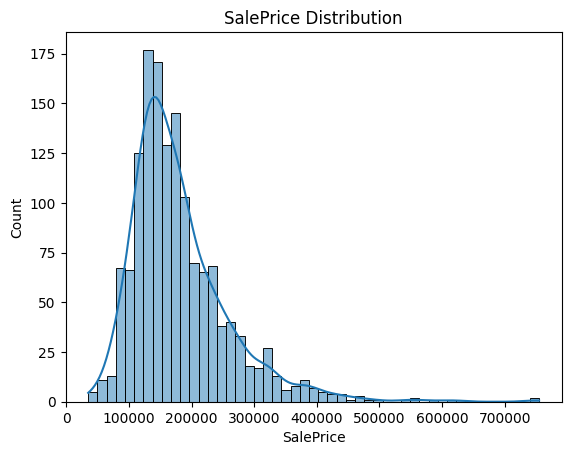

1.8828757597682129


In [10]:
sns.histplot(data['SalePrice'], kde=True)
plt.title('SalePrice Distribution')
plt.show()

# skewness
#Highly skewed data (>|1|) affects regression models, as they assume normally distributed data.
print(data['SalePrice'].skew())

* check for outliers

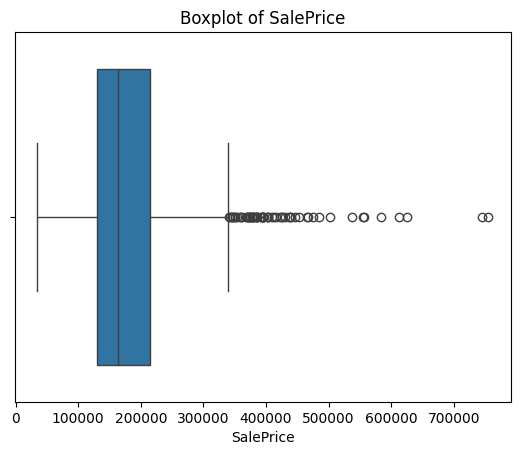

In [11]:
sns.boxplot(x=data['SalePrice'])
plt.title('Boxplot of SalePrice')
plt.show()

# Explore Features (categorical_features vs numerical_features)

* use .select_dtypes() to filter them

In [12]:
catagorical_features =data.select_dtypes(include=['object']).columns


# Numerical features
numeric_features =data.select_dtypes(include=['int64','float64']).columns


* Analyze the distribution of categories using bar plots
* check the relationship btwn categorical features and SalesPrice using boxplots

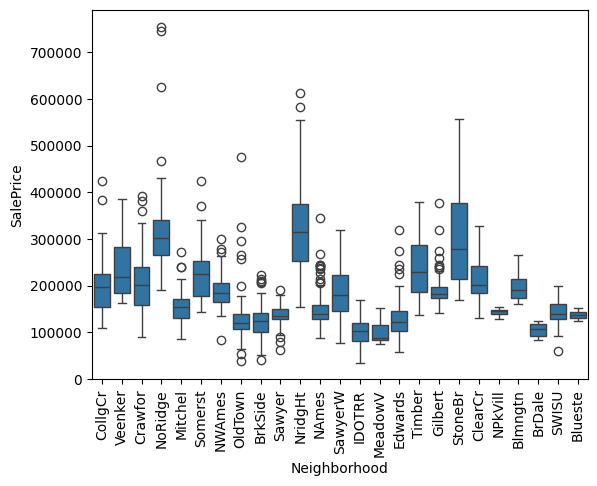

In [13]:
sns.boxplot(x=data['Neighborhood'], y='SalePrice', data=data)
plt.xticks(rotation=90)
plt.show()

# Numerical Features
* Analyze the distribution of numerical features using histograms or density plots
* Check the correlation btwn numerical features and Saleprice using scatter plot or a correlation matrix

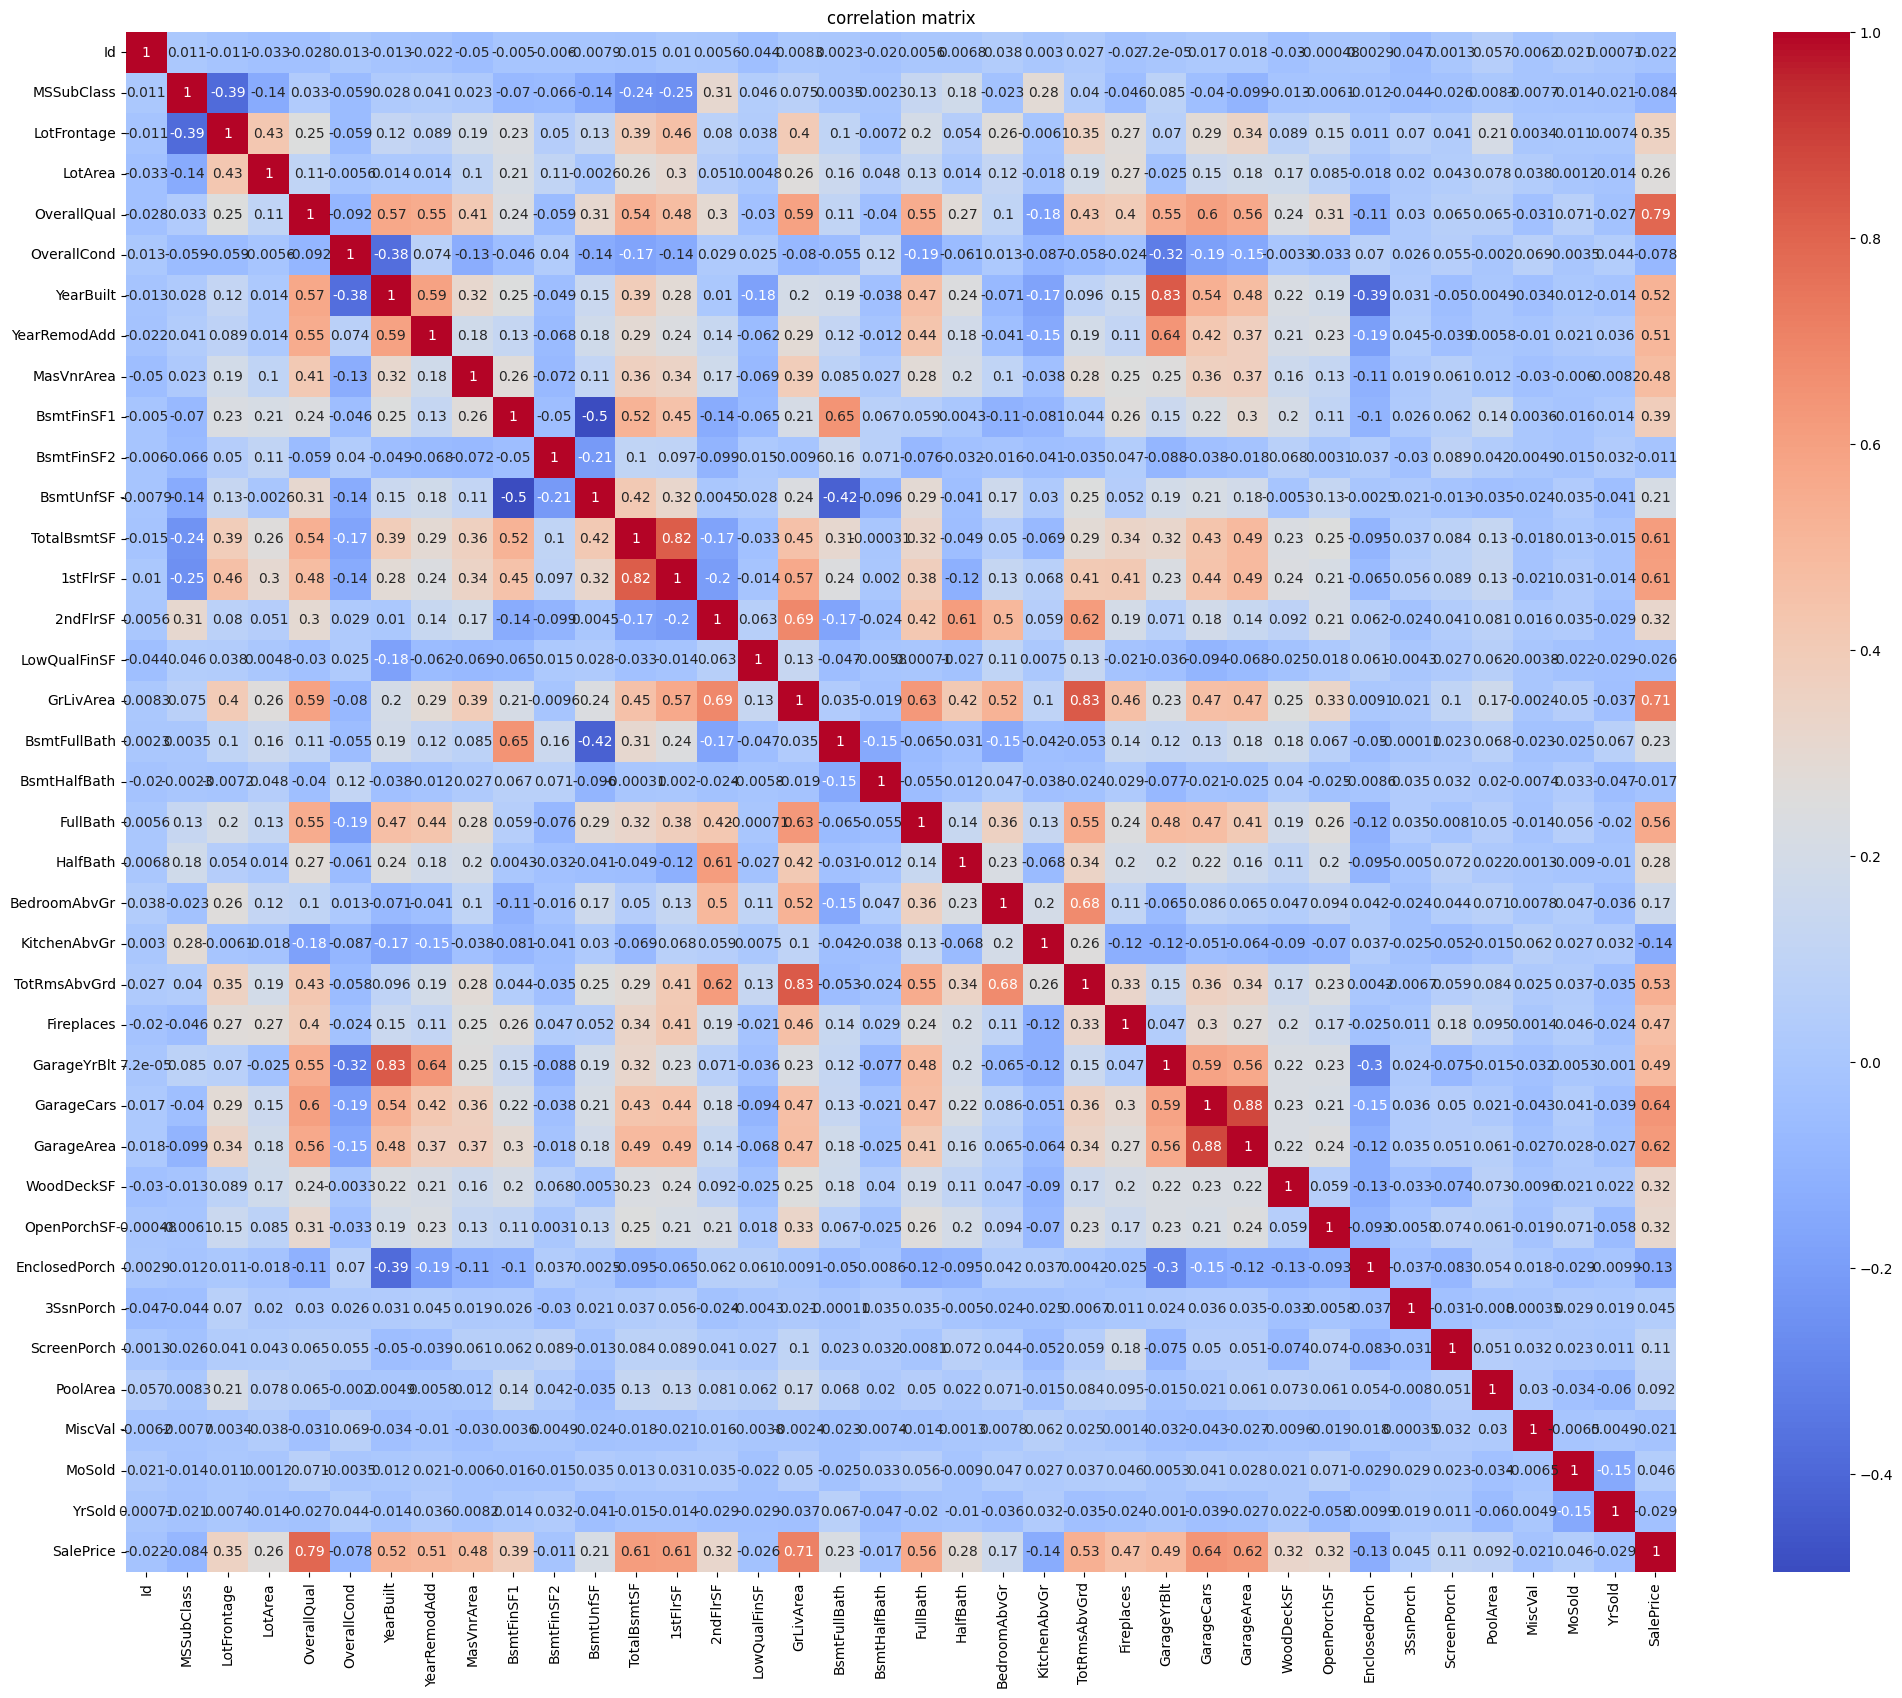

In [14]:
# correlation matrix
corr =data[numeric_features].corr()
plt.figure(figsize=(25,20))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('correlation matrix')
plt.show()

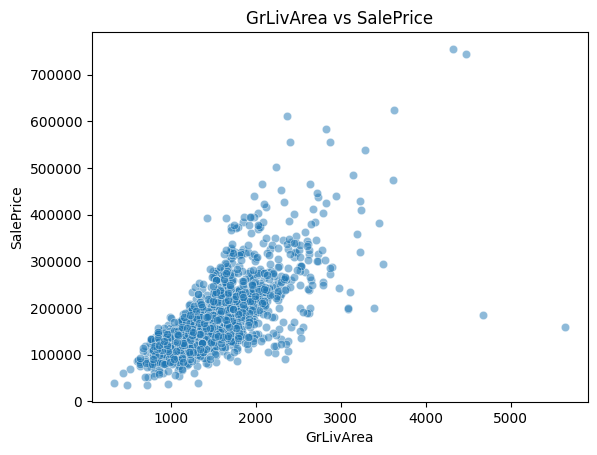

In [15]:
# Example: Scatterplot between 'GrLivArea' and 'SalePrice'
sns.scatterplot(x='GrLivArea', y='SalePrice', data=data, alpha=0.5)
plt.title('GrLivArea vs SalePrice')
plt.show()

## Hypothesis summary (My Findings)
* Hypothesis 1: Larger houses (higher GrLivArea) have higher sale prices.Supported by a positive correlation between GrLivArea and SalePrice.

* Hypothesis 2: Houses in certain neighborhoods (Neighborhood) have higher sale prices.Supported by boxplots showing variation in SalePrice across neighborhoods.

* Hypothesis 3: Newer houses (YearBuilt) have higher sale prices.Supported by a positive correlation between YearBuilt and SalePrice.

* Hypothesis 4: Houses with better overall quality (OverallQual) have higher sale prices.Supported by a strong positive correlation between OverallQual and SalePrice.

* Hypothesis 5: Houses with garages (GarageArea) have higher sale prices.Supported by a positive correlation between GarageArea and SalePrice.








# [3rd] Perform Feature Engineering

* perform attribute combination(increases chances of creating a accurate model)

# Identify Features to Combine
* Based on domain knowledge and EDA, here are some features that can be combined meaningfully:

* Total Area:

* Combine TotalBsmtSF (Total Basement Square Feet) and GrLivArea (Above Ground Living Area) to get the total area of the house.

* Bathroom Ratio:

* Combine FullBath (Full Bathrooms) and TotRmsAbvGrd (Total Rooms Above Ground) to get the ratio of bathrooms to rooms.

* House Age:

* Subtract YearBuilt from the current year to get the age of the house.

* Quality-Living Area Interaction:

* Multiply OverallQual (Overall Quality) and GrLivArea to capture the interaction between quality and size.

* Lot Area Ratio:
* Divide GrLivArea by LotArea to get the ratio of living area to lot size.

In [16]:
# 1. Total Area: Basement + Above Ground Living Area
data['TotalArea'] =data['TotalBsmtSF'] + data['GrLivArea']

# 2. Bathroom Ratio: Full Bathrooms / Total Rooms Above Ground
data['BathroomRatio'] = data['FullBath'] / data['TotRmsAbvGrd']

# 3. House Age: Current Year - Year Built
data['HouseAge'] = 2023 - data['YearBuilt']

# 4. Quality-Living Area Interaction: Overall Quality * Living Area
data['QualLivArea'] =data['OverallQual'] * data['GrLivArea']

# 5. Lot Area Ratio: Living Area / Lot Area
data['LotAreaRatio'] =data['GrLivArea'] / data['LotArea']




# Handle Potential Issues
* Division by Zero:

* For features like BathroomRatio and LotAreaRatio, ensure the denominator is not zero. You can replace zeros with a small value (e.g., 1) or handle missing values.

In [17]:

# Handle division by zero for BathroomRatio
data['BathroomRatio'] =data['BathroomRatio'].replace([
    float('inf'), -float('inf')], 0)

# Handle division by zero for LotAreaRatio
data['LotAreaRatio'] = data['LotAreaRatio'].replace([float('inf'),
                                                     -float('inf')], 0)


* Check for missing values in new features

In [18]:
check_missing_values = data[['TotalArea', 'BathroomRatio', 'HouseAge',
                             'QualLivArea', 'LotAreaRatio']].isnull().sum()
check_missing_values

TotalArea        0
BathroomRatio    0
HouseAge         0
QualLivArea      0
LotAreaRatio     0
dtype: int64

* verify new features (correlation)

In [19]:
new_features_corr= ['TotalArea', 'BathroomRatio', 'HouseAge',
                    'QualLivArea', 'LotAreaRatio', 'SalePrice']
correlation_matrix = data[new_features_corr].corr()
correlation_matrix

,TotalArea,BathroomRatio,HouseAge,QualLivArea,LotAreaRatio,SalePrice
TotalArea,1.000000,0.109585,-0.335488,0.888527,0.035046,0.778959
BathroomRatio,0.109585,1.000000,-0.455073,0.145379,0.182243,0.201544
HouseAge,-0.335488,-0.455073,1.000000,-0.365204,-0.117388,-0.522897
QualLivArea,0.888527,0.145379,-0.365204,1.000000,0.132637,0.832057
LotAreaRatio,0.035046,0.182243,-0.117388,0.132637,1.000000,-0.002416
SalePrice,0.778959,0.201544,-0.522897,0.832057,-0.002416,1.000000


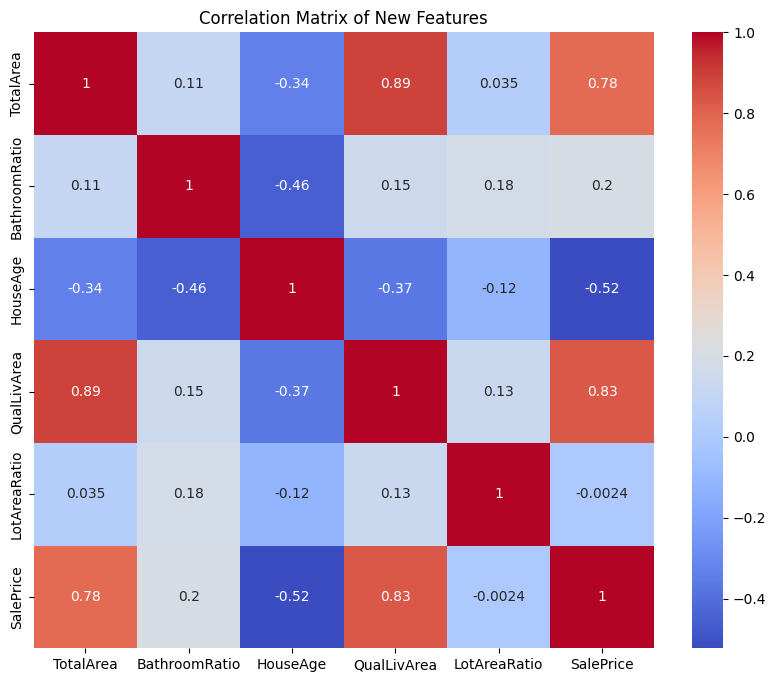

In [20]:
# plot the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of New Features')
plt.show()

# Interpret the Results
* TotalArea: Likely to have a strong positive correlation with SalePrice since larger houses tend to be more expensive.

* BathroomRatio: Might have a moderate correlation, as houses with more bathrooms relative to rooms could be more desirable.

* HouseAge: Could have a negative correlation, as older houses might be less valuable (unless they are historic or well-maintained).

* QualLivArea: Likely to have a strong positive correlation, as high-quality, large houses are typically more expensive.

* LotAreaRatio: Might have a moderate correlation, as houses with a higher living area relative to lot size could be more valuable.

## Data Cleaning
* Leverage SimpleImputer (sklearn class)

In [21]:
from sklearn.impute import SimpleImputer

# Create an instance of the SimpleImputer class
imputer = SimpleImputer(strategy='median')

#  median can be performed on numerical features only
data_numeric = data.select_dtypes(include=[np.number])

# fit the imputer to the data
imputer.fit(data_numeric)

# imputer calculates the median of each column and stores it in the statistics_ attribute
imputer.statistics_
data_numeric.median().values

array([7.30500000e+02, 5.00000000e+01, 6.90000000e+01, 9.47850000e+03,
       6.00000000e+00, 5.00000000e+00, 1.97300000e+03, 1.99400000e+03,
       0.00000000e+00, 3.83500000e+02, 0.00000000e+00, 4.77500000e+02,
       9.91500000e+02, 1.08700000e+03, 0.00000000e+00, 0.00000000e+00,
       1.46400000e+03, 0.00000000e+00, 0.00000000e+00, 2.00000000e+00,
       0.00000000e+00, 3.00000000e+00, 1.00000000e+00, 6.00000000e+00,
       1.00000000e+00, 1.98000000e+03, 2.00000000e+00, 4.80000000e+02,
       0.00000000e+00, 2.50000000e+01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.00000000e+00,
       2.00800000e+03, 1.63000000e+05, 2.47900000e+03, 2.50000000e-01,
       5.00000000e+01, 8.82000000e+03, 1.55687283e-01])

In [22]:
# use the trained imputer to transform the data
x = imputer.transform(data_numeric)

* Handling Text & categorical Attributes

In [23]:
from sklearn.preprocessing import OneHotEncoder
catagorical_encoder = catagorical_features

#print(f'cat_attributes: {catagorical_encoder}')

# verify columns that contains unique values
potential_categorical = ['MSSubClass', 'OverallQual', 'OverallCond',
                          'YearBuilt', 'YearRemodAdd', 'MoSold', 'YrSold']
for col in potential_categorical:#print(f'{col} has {data[col].nunique()} unique values')
    None

# Create an instance of the OneHotEncoder class
cat_encoder= OneHotEncoder()
data_cat_1hot = cat_encoder.fit_transform(data[catagorical_encoder])
data_cat_1hot



<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 62780 stored elements and shape (1460, 267)>

In [24]:
# convert the sparse matrix to a dense array
data_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], shape=(1460, 267))

In [25]:
# Get the list of categories
cat_encoder.categories_

[array(['C (all)', 'FV', 'RH', 'RL', 'RM'], dtype=object),
 array(['Grvl', 'Pave'], dtype=object),
 array(['Grvl', 'Pave', nan], dtype=object),
 array(['IR1', 'IR2', 'IR3', 'Reg'], dtype=object),
 array(['Bnk', 'HLS', 'Low', 'Lvl'], dtype=object),
 array(['AllPub', 'NoSeWa'], dtype=object),
 array(['Corner', 'CulDSac', 'FR2', 'FR3', 'Inside'], dtype=object),
 array(['Gtl', 'Mod', 'Sev'], dtype=object),
 array(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
        'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel',
        'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown',
        'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber',
        'Veenker'], dtype=object),
 array(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNe',
        'RRNn'], dtype=object),
 array(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNn'],
       dtype=object),
 array(['1Fam', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE'], dtype=objec

* Feature scaling

In [26]:
# scale all numeric attributes 
from sklearn.preprocessing import StandardScaler

std_scaler =StandardScaler()
df_num_scaled = std_scaler.fit_transform(data_numeric)
df_num_scaled

array([[-1.73086488,  0.07337496, -0.20803433, ..., -1.05099379,
         0.44282698,  0.19465111],
       [-1.7284922 , -0.87256276,  0.40989452, ..., -0.15673371,
        -0.40539422, -0.43916611],
       [-1.72611953,  0.07337496, -0.08444856, ..., -0.9847523 ,
         0.54543127, -0.19516938],
       ...,
       [ 1.72611953,  0.30985939, -0.16683907, ...,  1.00249232,
         1.29336256,  0.69901094],
       [ 1.7284922 , -0.87256276, -0.08444856, ...,  0.70440562,
        -0.82622611, -0.62257328],
       [ 1.73086488, -0.87256276,  0.20391824, ...,  0.20759447,
        -0.65457607, -0.48441322]], shape=(1460, 43))

* Transform Pipelines

In [27]:
# create numeric transformed pipeline

from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),

])

df_num_prepared =num_pipeline.fit_transform(data_numeric)
df_num_scaled[:2].round(2)

array([[-1.73,  0.07, -0.21, -0.21,  0.65, -0.52,  1.05,  0.88,  0.51,
         0.58, -0.29, -0.94, -0.46, -0.79,  1.16, -0.12,  0.37,  1.11,
        -0.24,  0.79,  1.23,  0.16, -0.21,  0.91, -0.95,  0.99,  0.31,
         0.35, -0.75,  0.22, -0.36, -0.12, -0.27, -0.07, -0.09, -1.6 ,
         0.14,  0.35, -0.01,  0.09, -1.05,  0.44,  0.19],
       [-1.73, -0.87,  0.41, -0.09, -0.07,  2.18,  0.16, -0.43, -0.57,
         1.17, -0.29, -0.64,  0.47,  0.26, -0.8 , -0.12, -0.48, -0.82,
         3.95,  0.79, -0.76,  0.16, -0.21, -0.32,  0.6 , -0.1 ,  0.31,
        -0.06,  1.63, -0.7 , -0.36, -0.12, -0.27, -0.07, -0.09, -0.49,
        -0.61,  0.01, -0.06,  1.17, -0.16, -0.41, -0.44]])

In [28]:
# create pipeline for categorical attributes

from sklearn.pipeline import Pipeline

cat_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(handle_unknown='ignore')),

])
df_cat_prepared = cat_pipeline.fit_transform(data[catagorical_encoder])
print(df_cat_prepared[:2].toarray())

[[0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1.
  1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.
  0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0.
  1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.
  

* So far, we have handled the categorical columns and the numerical columns
separately. It would be more convenient to have a single transformer capable of
handling all columns, applying the appropriate transformations to each column.
* For this, you can use a ColumnTransformer. For example, the following
ColumnTransformer will apply num_pipeline (the one we just
defined) to the numerical attributes, and cat_pipeline to the categorical
attribute:

In [63]:
# use ColumnTransformer to combine both piprlines

from sklearn.compose import ColumnTransformer

numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.drop('SalePrice')
categorical_cols = data.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer([
    ("num", num_pipeline, numeric_cols),
    ("cat", cat_pipeline, categorical_cols),
])

* Ready to apply the columnTransformer to the data

In [64]:
data_prepared =preprocessor.fit_transform(data)

In [58]:
# get the columns name

preprocessor.get_feature_names_out()

array(['num__Id', 'num__MSSubClass', 'num__LotFrontage', 'num__LotArea',
       'num__OverallQual', 'num__OverallCond', 'num__YearBuilt',
       'num__YearRemodAdd', 'num__MasVnrArea', 'num__BsmtFinSF1',
       'num__BsmtFinSF2', 'num__BsmtUnfSF', 'num__TotalBsmtSF',
       'num__1stFlrSF', 'num__2ndFlrSF', 'num__LowQualFinSF',
       'num__GrLivArea', 'num__BsmtFullBath', 'num__BsmtHalfBath',
       'num__FullBath', 'num__HalfBath', 'num__BedroomAbvGr',
       'num__KitchenAbvGr', 'num__TotRmsAbvGrd', 'num__Fireplaces',
       'num__GarageYrBlt', 'num__GarageCars', 'num__GarageArea',
       'num__WoodDeckSF', 'num__OpenPorchSF', 'num__EnclosedPorch',
       'num__3SsnPorch', 'num__ScreenPorch', 'num__PoolArea',
       'num__MiscVal', 'num__MoSold', 'num__YrSold', 'num__SalePrice',
       'num__TotalArea', 'num__BathroomRatio', 'num__HouseAge',
       'num__QualLivArea', 'num__LotAreaRatio', 'cat__MSZoning_C (all)',
       'cat__MSZoning_FV', 'cat__MSZoning_RH', 'cat__MSZoning_RL',
   

# [4th] Select & Train a model

* Split data for training and testing

In [65]:
# import train_test_split()

from sklearn.model_selection import train_test_split

x = data_prepared
y = data['SalePrice']

x_train, x_test, y_train, y_text = train_test_split(x, y, test_size=0.2, random_state=42)

print(f"Training set size: {x_train.shape}")
print(f"Testing set size: {x_test.shape}")

Training set size: (1168, 293)
Testing set size: (292, 293)


In [68]:
# train the model

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train)

LinearRegression()

In [53]:
get_saleprice = data['SalePrice']
get_saleprice.head(5)

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [67]:
# predict the house values

house_prediction = lin_reg.predict(x_test)

house_prediction[:5].round(2)



array([155651.13, 350701.09,  91055.76, 165760.48, 310774.89])

In [69]:
# find the error

from sklearn.metrics import mean_absolute_error, r2_score

get_error =mean_absolute_error(house_prediction, y_text)
get_error

r2 = r2_score(y_text, house_prediction)
r2

0.9008140119593174

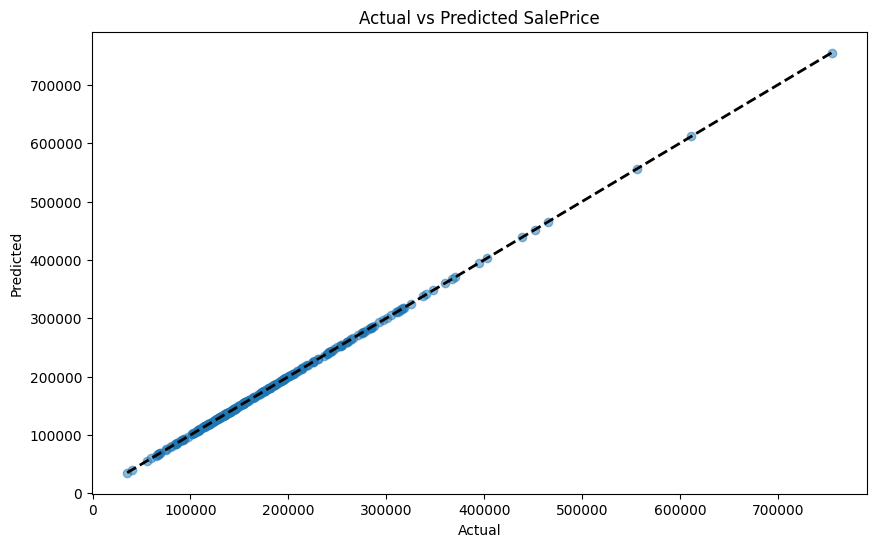

In [37]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_text, house_prediction, alpha=0.5)
plt.plot([y_text.min(), y_text.max()], [y_text.min(), y_text.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted SalePrice')
plt.show()

* Try training the model using DecisionTreeRgressor

In [70]:
import joblib

joblib.dump(lin_reg, 'house_price_competion_kaggle.pkl' )

['house_price_competion_kaggle.pkl']

In [62]:
# DecisionTreeRegressor

from sklearn.tree import DecisionTreeRegressor

d_tree_reg = DecisionTreeRegressor(random_state=42)
d_tree_reg.fit(x_train, y_train)

d_tree_reg


DecisionTreeRegressor(random_state=42)

In [40]:
predictions_house = d_tree_reg.predict(x_test)
predictions_house[:5]

array([154000., 325000., 115000., 158500., 314813.])

In [41]:
tree_rmse =mean_absolute_error(predictions_house, y_text)
tree_rmse

1189.4349315068494

In [42]:
# RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(x_train, y_train)


RandomForestRegressor(random_state=42)

In [43]:
precditions_model = forest_reg.predict(x_test)
precditions_model[:5]

array([153907.37, 325676.36, 115116.62, 159028.08, 314349.69])

# Testing the model using the test dataset

In [74]:
# Load the test data
test_data = pd.read_csv(r'C:\Users\ronny somi\Downloads\home-data-for-ml-course\test.csv')

# Create the same features in the test data as you did in the training data
test_data['TotalArea'] = test_data['TotalBsmtSF'] + test_data['GrLivArea']
test_data['BathroomRatio'] = test_data['FullBath'] / test_data['TotRmsAbvGrd']
test_data['HouseAge'] = 2023 - test_data['YearBuilt']
test_data['QualLivArea'] = test_data['OverallQual'] * test_data['GrLivArea']
test_data['LotAreaRatio'] = test_data['GrLivArea'] / test_data['LotArea']

# Handle division by zero for BathroomRatio and LotAreaRatio
test_data['BathroomRatio'] = test_data['BathroomRatio'].replace([float('inf'), -float('inf')], 0)
test_data['LotAreaRatio'] = test_data['LotAreaRatio'].replace([float('inf'), -float('inf')], 0)

# Preprocess the test data
test_data_prepared = preprocessor.transform(test_data)

# Make predictions on the test data
test_predictions = lin_reg.predict(test_data_prepared)
test_predictions.round(2)



array([123292.18, 165948.74, 186287.62, ..., 181211.68, 113564.67,
       221530.53], shape=(1459,))

In [ ]:
# Create a DataFrame for submission
submission = pd.DataFrame({
    'Id': test_data['Id'],  # Assuming 'Id' is the column name for the house IDs
    'SalePrice': test_predictions
})

# Save the submission file
submission.to_csv('submission.csv', index=False)